<a href="https://colab.research.google.com/github/RenanCostaNascimento/mestrado-redes-neurais/blob/main/Compara%C3%A7%C3%A3o_do_perceptron_criterion_com_hinge_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def geraDataset(tamanho = 20):
  # 20 amostras, 2 características
  X = np.random.uniform(size=(tamanho, 2))
  # Rótulos
  y = np.array(X[:,0] > X[:,1], dtype=int) * 2 - 1

  return X, y

In [ ]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k], "o", alpha=0.3)

def plotaVetor(vetor, cor="k"):
  origem = [0,0]
  plt.arrow(*origem, *vetor, color=cor)

def perpencidular(vetor):
  perp = np.array(vetor[::-1])
  perp[0] *= -1
  return perp

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
  @staticmethod
  def erro(y, ypred):
    return y - ypred

  @staticmethod
  def custo(y, ypred):
    # o custo é multiplicado ao quadrado, pois os possíveis valores são 0 (acerto), 2 (falso negativo) e -2 (falso positivo)
    # nisso, ao somarmos 2 com -2 ficaremos com zero, dando a impressão que não há erro
    # ao elevarmos ao quadrado, teremos que 2 e -3 virarão 4, e o erro será somado corretamente
    return np.sum(CustoPerceptron.erro(y, ypred)**2)
  
  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(CustoPerceptron.erro(y, ypred), X)


class HingeLoss():
  @staticmethod
  def erro(y, ypred):
    return np.multiply(y, ypred)

  @staticmethod
  def custo(y, ypred):
    return np.sum(1 - HingeLoss.erro(y, ypred))
  
  @staticmethod
  def gradiente(y, ypred, X):
    # os marginais são os elementos que estavam bem próximo da margem de separação, ou seja, o erro é menor do que 1
    marginais = HingeLoss.erro(y, ypred) < 1
    return np.matmul(y[marginais], X[marginais])


class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    # taxa de aprendizado
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo

  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=2)

    for _ in range(self.maxiter):
      ypred = self.predict(X)
      custo = self.custo.custo(y, ypred)

      # atualiza os pesos em cada iteração, descida de gradiente
      self.w = self.w + self.alpha * self.custo.gradiente(y, ypred, X)

      if custo == 0:
        break

  def predict(self, X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)

    return ypred

0.972
[ 1.3564436  -1.29296697]


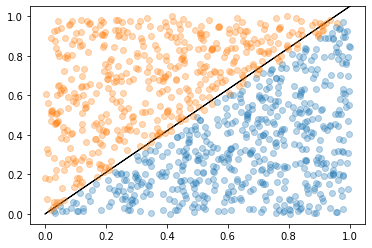

In [ ]:
# dataset
X, y = geraDataset(20)
# base de teste
Xte, yte = geraDataset(1000)

# Perceptron padrão
perceptron = Perceptron()
perceptron.fit(X, y)

ypred1 = perceptron.predict(Xte)
print(sum(yte == ypred1) / len(yte))

plotDataset(Xte, yte)
print(perceptron.w)
plotaVetor(perpencidular(perceptron.w))

0.979
[ 0.66089606 -0.63460337]


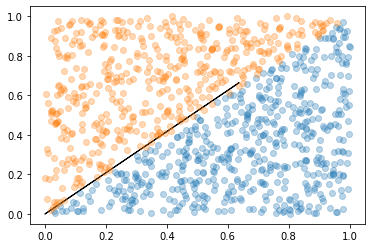

In [ ]:
# Perceptron usando HingeLoss
hingePerceptron = Perceptron(custo=HingeLoss())
hingePerceptron.fit(X, y)

ypred2 = hingePerceptron.predict(Xte)
print(sum(yte == ypred2) / len(yte))

plotDataset(Xte, yte)
print(hingePerceptron.w)
plotaVetor(perpencidular(hingePerceptron.w))

Eu fiz os testes usando os dois critérios do Perceptron várias vezes, e na maioria delas o Hinge-Loss foi superior. No entanto, a diferença entre os dois era sempre pequena.